<center>
<a href="http://www.udem.edu.co/"><img src="Escudo.png"></a>
<h1>Reconocimiento de Patrones I y II</h1>
<h2>Operaciones de transformación de imágenes</h2>
<h3>2018-2</h3>
</center>

### Introducción

La transformación de una imagen consiste en modificar el contenido de la misma con un objetivo
concreto, como puede ser el de prepararla para un posterior análisis. Se pueden distinguir dos tipos
de transformaciones: basadas en los niveles de intensidad de la imagen, o como consecuencia de la
aplicación de una operación geométrica. Dentro del primer grupo se consideran por un lado las
transformaciones que son consecuencia de la aplicación de una función sobre el valor de intensidad
de cada píxel individualmente, y las transformaciones en las que los píxeles vecinos intervienen en
la misma con distintas finalidades, tales como eliminar el ruido presente en la imagen para así
suavizarla o con el fin de extraer bordes. Las transformaciones lógicas se aplican considerando que
los valores numéricos de las imágenes se pueden representar a nivel de bits. Dentro del segundo
grupo se incluyen las transformaciones geométricas, las cuales modifican las coordenadas
espaciales de la imagen, ofreciendo aspectos de la misma bajo diferentes resoluciones, siendo en
ocasiones necesario modificar también los valores de intensidad de los píxeles de la imagen
original.

## Transformaciones basadas en los niveles de intesidad

Las transformaciones en las que la generación de un nuevo píxel se obtiene en función del valor de
intensidad, pueden clasificarse en dos tipos:
1. Operaciones basadas en un píxel individual de la imagen (Ej: brillo, negativo, ecualización del histograma).
2. Operaciones involucrando píxeles vecinos.
Por tanto, la generación de un nuevo píxel dependerá bien del valor concreto de cada píxel, o del
valor de los píxeles próximos a él, lo que se conoce como vecindad del píxel o vecindario, como
muestra la figura 1.

<img src="images\Fig_1.png">

### Operaciones centradas en un píxel individual

<img src="images\Fig_2.png">

$$S(i,j) = f(E(i,j))$$

La función $f$ de la ecuación anterior, que puede ser lineal o no lineal, es la transformación que se aplica a la imagen original. A continuación se definen las principales funciones de transformación que se trabajan en el procesamiento digital de imágenes.

De la clase anterior teníamos ...

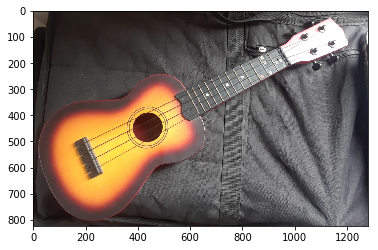

In [1]:
from PIL import Image             #Estamos usando la librería Pillow con PIL
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica
%matplotlib inline

ukelele = Image.open("img/ukelele.jpeg")
#Para visualizar la imagen en el notebook
plt.imshow(np.asarray(ukelele))
plt.show()

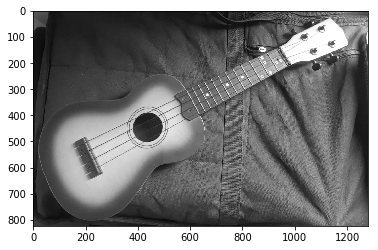

(1280, 823) L None


In [2]:
uke_gris = ukelele.convert('L')
#I_gris.show()
plt.imshow(np.asarray(uke_gris), cmap='gray')
plt.show()
print (uke_gris.size, uke_gris.mode, uke_gris.format)

In [3]:
Img_uke = np.asarray(uke_gris,dtype=np.float32)

### Contraste. Ejercicio de la clase anterior

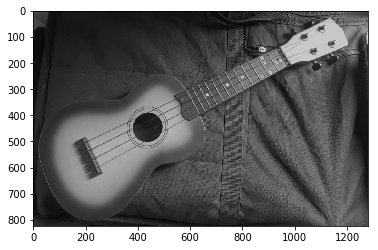

In [4]:


def contraste(img,cmax,cmin,tipo):
    
    Imin = np.min(img)
    Imax = np.max(img)
    
    filas = np.size(img,0)
    columnas = np.size(img,1)
    
    I = np.zeros((filas, columnas))
    
    if tipo == 'disminuir':
        
        for i in range(0,filas):
            for j in range(0,columnas):
                I[i,j] = (((cmax-cmin)/(Imax-Imin))*(img[i,j]-Imin))+cmin
                
    elif tipo == 'aumentar':
        for i in range(0,filas):
            for j in range(0,columnas):
                I[i,j] = ((img[i,j]-Imin)/(Imax-Imin))*(cmax-cmin)+cmin
                
    return I

    
I_low_cont = contraste(Img_uke,200,0,'disminuir')
Inew = Image.fromarray(I_low_cont.astype(np.uint8))
plt.imshow(Inew)
#plt.imshow(I, cmap='gray')

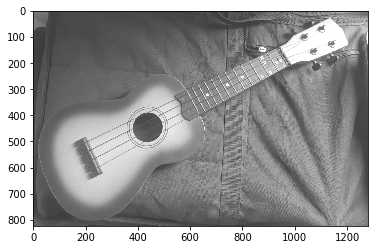

In [5]:
I_high_cont = contraste(Img_uke,255,50,'aumentar')
Inew = Image.fromarray(I_high_cont.astype(np.uint8))
plt.imshow(Inew)
#plt.imshow(I, cmap='gray')

### Ecualización del histograma. Ejercicio de la clase anterior.

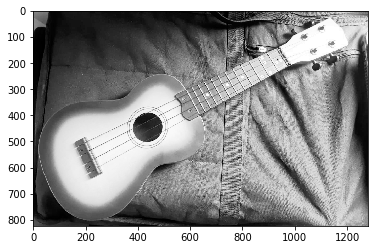

In [6]:

#Genera el histograma de la Imagen
#Paso 1:
filas = np.size(Img_uke,0)
columnas = np.size(Img_uke,1)
dimImg = filas*columnas
#print(dimImg)
hist,bins = np.histogram(Img_uke.flatten(),256,[0,256])
#print(np.max(hist))
hist_norm = (hist/dimImg)*255
#print(np.max(hist_norm))
#print(hist)
#print(hist_norm)

#Paso2:
#Genera la función de distribución acumulada (cdf por sus siglas en inglés)
cdf = hist_norm.cumsum()
t = 0
for item in cdf:
    cdf[t] = np.round(item)
    t +=1
    
new_Img = np.zeros((filas, columnas))
for i in range(0,filas):
    for j in range(0,columnas):
        
        intensidad = int(Img_uke[i,j])
        Hprima = cdf[intensidad]
        new_Img[i,j] = Hprima

Img = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(Img)


### Operador Inverso (Negativo)

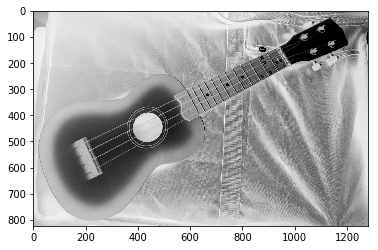

In [7]:
#Operador inverso (negativo)

def negativo(img):
    
    filas = np.size(img,0)
    columnas = np.size(img,1)
    
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            new_x = 255-img[i,j]
            new_Img[i,j] = new_x

    Img = Image.fromarray(new_Img.astype(np.uint8))
    plt.imshow(Img)
    #plt.imshow(new_Img2, cmap='gray')
    
negativo(Img_uke)

### Operador umbral

El operador umbral aplicado sobre la imagen original píxel a píxel proporciona
como resultado una imagen binaria, es decir, una imagen con dos niveles de intensidad, donde el valor de la variable p, conocido como umbral, hace las veces de discriminador que
decide a cuál de los dos niveles corresponde cada valor de intensidad del píxel de la imagen
original.

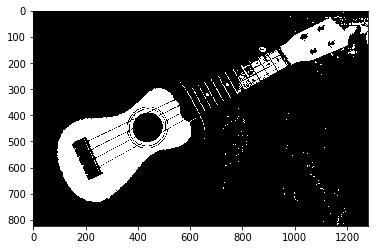

In [8]:
#Operador unmbral

def umbral(img, umbral):
    
    filas = np.size(img,0)
    columnas = np.size(img,1)
    
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if img[i,j] <= umbral:
                new_Img[i,j] = 0
            else:
                new_Img[i,j] = 255

    Img = Image.fromarray(new_Img.astype(np.uint8))
    plt.imshow(Img)
    #plt.imshow(new_Img2, cmap='gray')
    
umbral(Img_uke,160)


### Operador intervalo de umbral binario

La aplicación de este operador proporciona también una
imagen binaria. Si bien la diferencia con el operador umbral estriba en que aquí se
definen dos umbrales $p_1$ y $p_2$, de manera que si el valor de intensidad de un píxel de la imagen
original se encuentra dentro del intervalo delimitado por $p_1$ y $p_2$, se le asigna el valor 0 en la
imagen de salida, y 255 en caso contrario.

Existe una variante de este operador conocida como intervalo de umbral binario invertido, en la
que si el valor de intensidad de un píxel de la imagen de partida se encuentra dentro del intervalo
delimitado por $p_1$ y $p_2$, se le asigna el valor 255 en la imagen de salida, y 0 en caso contrario.

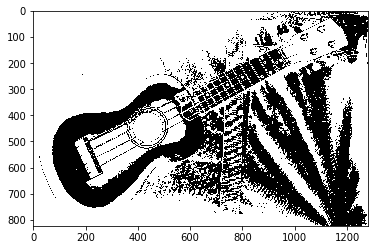

In [9]:
#Operador intervalo de umbral binario

def umbral_intervalo(img, u1, u2, invertido):
    

    filas = np.size(img,0)
    columnas = np.size(img,1)

    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if (img[i,j] > u1) and (img[i,j] < u2):
                if invertido == True:
                    new_Img[i,j] = 255
                else:
                    new_Img[i,j] = 0
            elif (img[i,j] <= u1) or (img[i,j] >= u2):
                if invertido == True:
                    new_Img[i,j] = 0
                else:
                    new_Img[i,j] = 255

    return new_Img
        
I_umbral_int = umbral_intervalo(Img_uke,100,200,invertido=False)
Img = Image.fromarray(I_umbral_int.astype(np.uint8))
plt.imshow(Img)
#plt.imshow(new_Img2, cmap='gray')
    

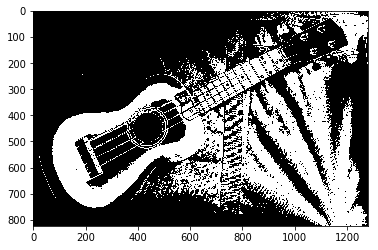

In [10]:
I_umbral_int = umbral_intervalo(Img_uke,100,200,invertido=True)
Img = Image.fromarray(I_umbral_int.astype(np.uint8))
plt.imshow(Img)
#plt.imshow(new_Img2, cmap='gray')

### Operador umbral de la escala de grises

La aplicación de este operador sobre la imagen original
genera como resultado una imagen en la que únicamente se preservan los valores de intensidad de
aquellos píxeles comprendidos dentro del intervalo definido por $p_1$ y $p_2$. En caso contrario, el
valor de salida será 255.

Al igual que ocurría con el operador intervalo de umbral binario, existe una variante de este
operador conocida como umbral de la escala de grises invertido, que transforma la imagen de
partida de manera que los píxeles con intensidades entre $p_1$ y $p_2$ son invertidos, y el resto toma el
valor 255.

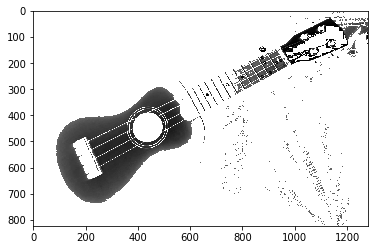

In [11]:
#Operador intervalo de umbral binario

def umbral_grises(img, u1, u2, invertido):
    

    filas = np.size(img,0)
    columnas = np.size(img,1)

    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if (img[i,j] > u1) and (img[i,j] < u2):
                if invertido == False:
                    new_Img[i,j] = img[i,j]
                else:
                    new_Img[i,j] = 255 - img[i,j]
                    
            elif (img[i,j] <= u1) or (img[i,j] >= u2):
                    new_Img[i,j] = 255
                    
    return new_Img
        
I_umbral_grises = umbral_grises(Img_uke,150,255,invertido=True)
Img = Image.fromarray(I_umbral_grises.astype(np.uint8))
plt.imshow(Img)
#plt.imshow(new_Img2, cmap='gray')
 

### Operador de extensión

Proporciona una imagen con la escala de grises completa para los píxeles
cuyo nivel de intensidad se encuentre comprendido dentro del intervalo abierto $(p_1,p_2)$.

<img src="images\extension.png">

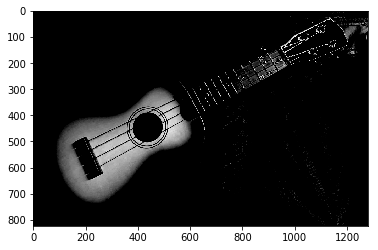

In [12]:
def extension(img, u1, u2):
    
    filas = np.size(img,0)
    columnas = np.size(img,1)

    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if (img[i,j] > u1) and (img[i,j] < u2):
                new_Img[i,j] = (img[i,j]-u1)*(255/(u2-u1))
                   
            elif (img[i,j] <= u1) or (img[i,j] >= u2):
                    new_Img[i,j] = 0
                    
    return new_Img
        
I_ext = extension(Img_uke,150,240)
Img = Image.fromarray(I_ext.astype(np.uint8))
plt.imshow(Img)
#plt.imshow(new_Img2, cmap='gray')

### Operador reducción del nivel de gris

Como su propio nombre indica, este operador reduce el
número de niveles de intensidad de la imagen original, en base a la siguiente ecuación,

<img src="images\reducir_gris.png">

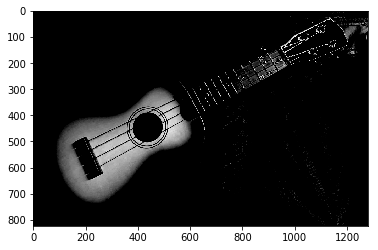

In [13]:
#Interpretar e implementar
def reducir_gris(img,n):
    
    p1 = 255/n

    filas = np.size(img,0)
    columnas = np.size(img,1)

    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            print("TODO")       
    
    return new_Img
        
I_ext = extension(Img_uke,150,240)
Img = Image.fromarray(I_ext.astype(np.uint8))
plt.imshow(Img)
#plt.imshow(new_Img2, cmap='gray')

Como se ha descrito hasta aquí, los anteriores operadores ofrecen la posibilidad de transformar una
imagen de partida tras la aplicación de una transformación basada en una función que puede ser bien
lineal o no lineal. Cabe la posibilidad también de generar una nueva imagen como resultado de aplicar
una transformación sobre dos imágenes, considerando dos píxeles uno de cada imagen y ubicados en la
misma posición espacial en sendas imágenes, tal y como refleja el esquema de la figura siguiente. El tamaño
de las dos imágenes ha de ser el mismo y la función utilizada, sea lineal o no, se aplicará a todos los
pares de píxeles de las dos imágenes de partida.

<img src="images\dos_en_una.png">


### Operador de adición

$$ S(i,j) = \frac{E_1(i,j)+E_2(i,j)}{k} $$

Donde $k$ es el número de imágenes a adicionar.

Esta operación es útil para reducir los efectos provocados en la imagen por el
ruido, ya que el resultado resulta ser el valor medio de los píxeles de entrada.

### Operador de substracción

$$ S(i,j) = k|E_1(i,j)+E_2(i,j)| $$

Esta operación es utilizada con el propósito de
detectar cambios producidos en las imágenes como consecuencia de haber sido tomadas en instantes
de tiempo diferentes. El movimiento es uno de tales cambios.

### Ejercicio

Construir los métodos para realizar las operaciones de adición y substracción.

## Transformaciones de vecindad

La principal diferencia entre las transformaciones de intensidad estudiadas en el apartado anterior, y
las transformaciones de vecindad es que en éstas el valor del píxel de salida se obtiene tras realizar
sobre el píxel de origen una combinación de los valores de los píxeles vecinos. Por tanto, la
transformación de la imagen se produce por la combinación de píxeles, en lugar de realizar una
transformación píxel a píxel.

De manera que el valor de intensidad del píxel de salida $S(x,y)$ es la suma promediada de los valores
de intensidad de los ocho vecinos alrededor del píxel de entrada $E(x, y)$. La transformación de una
imagen puede variar dependiendo de la influencia que cada uno de los vecinos ejerza en el promedio
sobre el resultado. Esto se consigue mediante una máscara que permite escoger de manera selectiva
los vecinos que intervienen en la transformación, y en qué medida contribuyen a la modificación del
píxel central.

Definición de máscara: Es una matriz (3x3) que permite ponderar la influencia que ejercen los vecinos de un pixel en su transformación.

### Ejercicio

Aplicar máscara a una imagen de prueba (sobre un píxel).

## Transformaciones lógicas

Dado que la representación interna de los datos en un ordenador se realiza finalmente mediante una
representación binaria, es posible aplicar operaciones lógicas binarias sobre estos datos. Las
operaciones lógicas habituales son: and, or, xor, not y derivadas.
Hemos estudiado diversas técnicas de transformación de imágenes píxel a píxel. Una
de ellas era el resultado de aplicar el operador umbral, donde una imagen en escala de grises se
transformaba en una imagen binaria según un determinado valor umbral: los píxeles cuyo valor de
intensidad no superaba el valor umbral se transformaban en el valor 0, y en caso contrario tomaban el
valor 255. Por tanto, se obtenía una imagen con dos únicos valores posibles (0 y 255).
Trasladándose al dominio de la lógica binaria matemática, pueden verse las imágenes binarias
anteriores formadas únicamente por valores lógicos “0” y “1”, donde el “0” lógico equivaldría al nivel
de intensidad 0, y el “1” lógico al nivel de intensidad 255. Por tanto, es posible aplicar operaciones
lógicas sobre la imagen o imágenes derivadas de la representación binaria de los datos que contienen.

Veamos un ejemplo de and, or y xor, con imagenes de prueba.

Dadas dos imágenes, es posible aplicar otro tipo de operaciones relacionales tales como $<$ , $>$ , $≤$ y
$≥$ . Por ejemplo, supónganse las imágenes $I_1$ e $I_2$, una imagen $R = I_1 ≤ I_2$ se obtendrá por comparación
píxel a píxel de los valores de las imágenes de entrada, de manera que un píxel de la imagen resultado
$R$ valdrá $1$ si cumple la relación y 0 si no la cumple.

## Transformaciones geométricas

Hasta el momento, se ha estudiado la transformación del contenido de las imágenes mediante la
modificación de los valores de intensidad de los píxeles. En este apartado se presenta un enfoque
diferente, tratando la manipulación de la imagen como un cambio en la posición de los píxeles en lugar
de la modificación de su valor. Este tipo de transformaciones supone un cambio en la distribución de
los píxeles respecto de un sistema de coordenadas, de manera que el resultado es una transformación
geométrica de la imagen original. Aunque también es cierto que algunas de estas transformaciones implican necesariamente la
modificación de los valores de intensidad como consecuencia de dicha transformación.
Con frecuencia, para el análisis de una imagen es preciso considerar más concretamente un área
dentro de la propia imagen que recibe el nombre de Región de Interés (en terminología inglesa Region
Of Interest - ROI). Para ello, es necesario disponer de operaciones geométricas que modifiquen las coordenadas espaciales de la imagen. Una operación geométrica tiene como objetivo principal
transformar los valores de una imagen tal y como podrían observarse desde otro punto de vista. De esta
manera, operaciones como magnificar o reducir una imagen no son más que aproximar o alejar el
punto de vista, realizar una rotación equivale a girar el punto de vista, y una traslación equivale a hacer
lo propio con dicho punto.
El paso previo a toda operación geométrica consiste en observar la distribución espacial de los
píxeles en la imagen original y en la transformada. En cualquier caso, tanto la imagen original como la
transformada asumen una estructura matricial, tal y como ilustra la siguiente figura:

<img src="images\rejilla.png">

Después de una transformación geométrica, puede darse el caso que ilustra la siguiente figura:

<img src="images\transformada_geo.png">

De tal manera que, por un lado es preciso determinar las coordenadas de cada píxel (x,y) en la rejilla
transformada (en líneas discontinuas). En general, los píxeles (x’, y’)
obtenidos tras la transformación no serán valores enteros y por tanto, no coincidirán con píxeles de la rejilla destino. Por otro lado, es necesario calcular los valores de los píxeles (x’,y’) en la rejilla destino
a partir de los valores conocidos de píxeles (x,y) entre ellos.
El primer paso depende de la transformación a realizar, mientras que el segundo corresponde a una
operación de interpolación. Una vez se ha aplicado una transformación geométrica, es preciso obtener
los valores de intensidad asociados con la transformación realizada, de forma que la imagen original
aparezca transformada geométricamente pero con los valores de intensidad obtenidos a partir de los
correspondientes en la imagen original. Es en este paso donde se genera la modificación de los valores
de intensidad de la imagen original.
En esta sección se estudiará en primer lugar el concepto de interpolación y la manera de calcular los
valores de intensidad asociados a una transformación geométrica, para después ver diferentes tipos de
funciones de transformación.

### Interpolación

La interpolación puede verse como el cálculo del valor de intensidad de un píxel, en una posición
cualquiera, como una función de los píxeles que le rodean (ocupando las posiciones enteras de la rejilla
destino). Si por ejemplo, se desea calcular el valor del píxel de coordenadas $(x, y)$ mostrado en la figura presentada a continuación, a partir de los valores de los píxeles de la rejilla $(i, j)$, entonces la formalización matemática de la
interpolación puede expresarse de la siguiente forma.

$$ p(x, y) = \sum_{i=-n}^{n} \sum_{i=-m}^{m} p(i, j)h (x-i, y-j) $$

donde $p(i,j)$ es el valor de un píxel de la imagen original en la posición espacial $(i,j)$, $p(x,y)$ es el valor
del píxel en la imagen resultante de la interpolación a partir de $p(i,j)$, y $h(x,y)$ es el núcleo de
interpolación. Existen diferentes núcleos de interpolación, de entre los cuales los más utilizados en el
tratamiento geométrico de imágenes son: vecino más próximo, bilineal y bicúbico.

<img src="images\interpolacion.png">

### Interpolación por vecino más próximo

Consiste en suponer que el píxel a ser interpolado, toma el mismo valor que el del píxel más
cercano de entre los cuatro que le rodean. Para decidir cuál es el píxel más cercano, se suele utilizar la
distancia euclídea. En la figura anterior tomaría el valor del píxel $p(i,j)$. Otra opción consiste en asignarle
la intensidad media asociada a los dos píxeles más cercanos, uno en la dirección horizontal $x$ y el otro
en la dirección vertical $y$. En este caso, en la figura anterior tomaría el valor medio entre $p(i,j)$ y $p(i+1,j)$.

El núcleo de interpolación $h(x,y)$ se define como sigue:

<img src="images\nucleo_inter.png">

### Interpolación bilineal

Otra forma de realizar la interpolación con mejores resultados que los obtenidos con la
interpolación por vecino más próximo, si bien a costa de una mayor carga computacional es la
interpolación bilineal, la cual asigna a cada píxel objeto de la transformación un valor medio
ponderado de las intensidades de los cuatro píxeles que le rodean.
El valor de intensidad del píxel interpolado, en función de los cuatro valores de intensidad de los
píxeles de su entorno, se calcula como sigue.

$$ p(x,y) = a_1p(i,j) + a_2p(i,j+1) + a_3p(i+1,j) + a_1p(i+1,j+1) $$

Los factores $(a_1, a_2, a_3, a_4)$ vienen dados por la distancia entre cada píxel y los de su entorno. Se calculan de la siguiente manera:

$a_1 = (1-dx)(1-dy)$; $a_2 = (dx)(1-dy)$; $a_3 = (1-dx)(dy)$; $a_4 = (dx)(dy)$ 

En la interpolación bilineal, el núcleo de la interpolación $h(x, y)$ se define como sigue,

<img src="images\nucleo_inter_2.png">

### Interpolación bicúbica

Una tercera forma realizar la interpolación con mejores resultados que la interpolación bilineal es la
interpolación bicúbica. En este caso, intervienen 16 puntos vecinos del píxel que se está interpolando.
La función de interpolación en este caso viene definida por la siguiente expresión,

<img src="images\nucleo_inter_3.png">

## Transformaciones elementales

Recordar que después de alguna transformación geométrica, se debe aplicar algún tipo de interpolación.

### Traslación:

Sea $(i,j)$ cualquier píxel de la imagen original, entonces, cada píxel de una imagen después de aplicar la traslación, estará dada por $(x,y)$, así:

$x = i + i_d$

$y = j + j_d$

y el píxel $(x,y)$ tomará el valor de intensidad del píxel $(i,j)$

### Rotación:

La rotación difiere de la traslación en que la transformación es un giro. La rotación de un ángulo θ
con respecto al origen de coordenadas de la imagen viene dada por la siguiente transformación,

$$ x = cos\theta_i - sen\theta_j $$

$$ x = sen\theta_i + cos\theta_j $$

La aplicación más importante de la rotación en una imagen es para simular determinadas
situaciones de giro de la cámara de captura de la escena, o el giro del propio objeto en situaciones de
movimiento. Otro uso habitual de esta transformación es para lograr efectos estéticos.
Los parámetros necesarios para llevar a cabo una rotación son el ángulo de giro y las coordenadas
del centro de rotación.

### Escalado:

La transformación de escalado consiste en variar el tamaño de la imagen original. Dicha variación
puede realizarse a lo largo de cualquiera de los ejes de coordenadas $x$ e $y$. De esta forma, se representa
mediante sendos factores de escala $S_x$ y $S_y$ en las direcciones x e y, respectivamente. Cuando el factor
toma valores entre $0$ y $1$, se produce una reducción de la propia imagen mientras que cuando son
mayores que la unidad, el resultado es un aumento. Esta transformación viene dada por las siguientes
expresiones,

$$ x = S_xi $$ 

$$ y = S_yj $$

Uno de los efectos más relevantes del escalado es el zoom cuyo proceso se realiza como sigue:
seleccionar una zona de la imagen (subimagen), separarla del resto de la imagen original y realizar una
expansión sobre la zona seleccionada. El proceso de expansión puede realizarse de distintas maneras,
siendo los más sencillos a la par que intuitivos los siguientes:

1. Repetir los valores de los píxeles previos, para crear un efecto de bloques.

2. Utilizar interpolación lineal: calcular el valor medio entre dos píxeles y usar dicho valor
como el valor del píxel entre los dos.

El segundo proceso se puede realizar en dos pasos, primero por filas, y después por columnas.

Ejercicio: Usando el método descrito en el segundo item, expandir la siguiente imagen.

<img src="images\img2expand.png"><!--<img src="images\img2expand_sol.png">-->

Este método permite ampliar una imagen de dimensión $NxN$ a otra de dimensión $(2N− 1)$ x (2N−1)$
pudiéndose repetir tantas veces como se desee.


### Referencias

Alegre, E., Pajares, G., & de la Escalera, A. (2016). Conceptos y Métodos en Visión por Computador.
